## Purpose of analysis:

- Build moving average of various stocks
- Determine correlations between stock returns
- Create Optimal portfolio
- Try to predict the future behavior of the stocks

## Importing Libraries

In [90]:
!pip install pandas_datareader
!pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime
import yfinance as yf


## Data Extraction

In [91]:
# Setting the beginning and ending
import yfinance as yf

# Define the time period
today = datetime.now()
year_ago = datetime(today.year-1, today.month, today.day)

# List of company ticker symbols
company_list = ['MSFT', 'AAPL', 'NVDA', 'UL', 'TSLA']

# Dictionary to hold the data
company_data = {}

# Fetch and store data for each company using yfinance
for company in company_list:
    globals()[company] = yf.download(company, start=year_ago, end=today)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [92]:
MSFT.head(5)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-05  329.000000  334.850006  328.660004  333.549988  331.065002   
2023-09-06  333.380005  334.459991  330.179993  332.880005  330.400024   
2023-09-07  331.290009  333.079987  329.029999  329.910004  327.452148   
2023-09-08  330.089996  336.160004  329.459991  334.269989  331.779633   
2023-09-11  337.239990  338.420013  335.429993  337.940002  335.422302   

              Volume  
Date                  
2023-09-05  18553900  
2023-09-06  17535800  
2023-09-07  18381000  
2023-09-08  19530100  
2023-09-11  16583300

In [93]:
AAPL.head(5)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-05  188.279999  189.979996  187.610001  189.699997  188.734238   
2023-09-06  188.399994  188.850006  181.470001  182.910004  181.978806   
2023-09-07  175.179993  178.210007  173.539993  177.559998  176.656021   
2023-09-08  178.350006  180.240005  177.789993  178.179993  177.272858   
2023-09-11  180.070007  180.300003  177.339996  179.360001  178.446869   

               Volume  
Date                   
2023-09-05   45280000  
2023-09-06   81755800  
2023-09-07  112488800  
2023-09-08   65551300  
2023-09-11   58953100

In [94]:
NVDA.head(5)

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2023-09-05  48.223000  48.851002  47.860001  48.548000  48.533470  382653000
2023-09-06  48.441002  48.549000  46.580002  47.061001  47.050789  468670000
2023-09-07  45.525002  46.344002  45.152000  46.241001  46.230968  433330000
2023-09-08  45.942001  46.605999  45.271000  45.571999  45.562115  473069000
2023-09-11  46.147999  46.162998  44.312000  45.178001  45.168198  473966000

In [95]:
UL.head(5)

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-09-05  50.410000  50.450001  50.000000  50.000000  48.298721  1446700
2023-09-06  49.840000  49.860001  49.630001  49.770000  48.076542  1730700
2023-09-07  50.060001  50.220001  49.959999  50.169998  48.462929  1560500
2023-09-08  50.360001  50.480000  50.250000  50.450001  48.733406  1323800
2023-09-11  50.540001  50.820000  50.459999  50.720001  48.994217  1519000

In [96]:
TSLA.head(5)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-05  245.000000  258.000000  244.860001  256.489990  256.489990   
2023-09-06  255.139999  255.389999  245.059998  251.919998  251.919998   
2023-09-07  245.070007  252.809998  243.270004  251.490005  251.490005   
2023-09-08  251.220001  256.519989  246.669998  248.500000  248.500000   
2023-09-11  264.269989  274.850006  260.609985  273.579987  273.579987   

               Volume  
Date                   
2023-09-05  129469600  
2023-09-06  116959800  
2023-09-07  115312900  
2023-09-08  118367700  
2023-09-11  174667900

## Time Series Graph of Adj. Closed Price

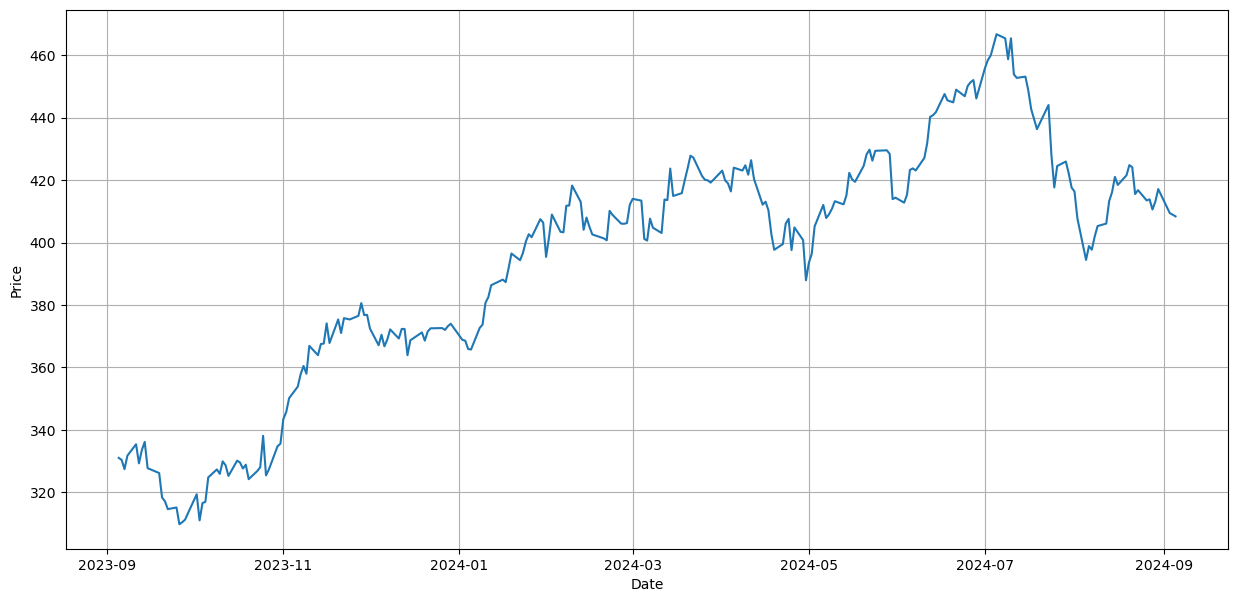

In [97]:
plt.figure(figsize=(15, 7))
plt.plot(MSFT['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

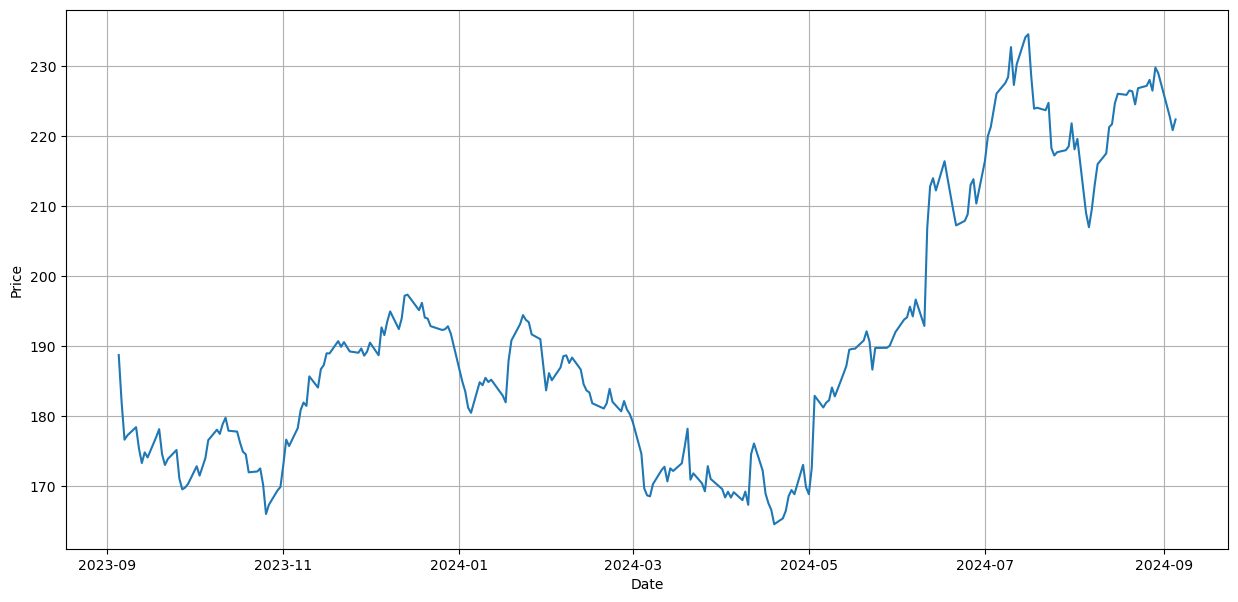

In [98]:
plt.figure(figsize=(15, 7))
plt.plot(AAPL['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

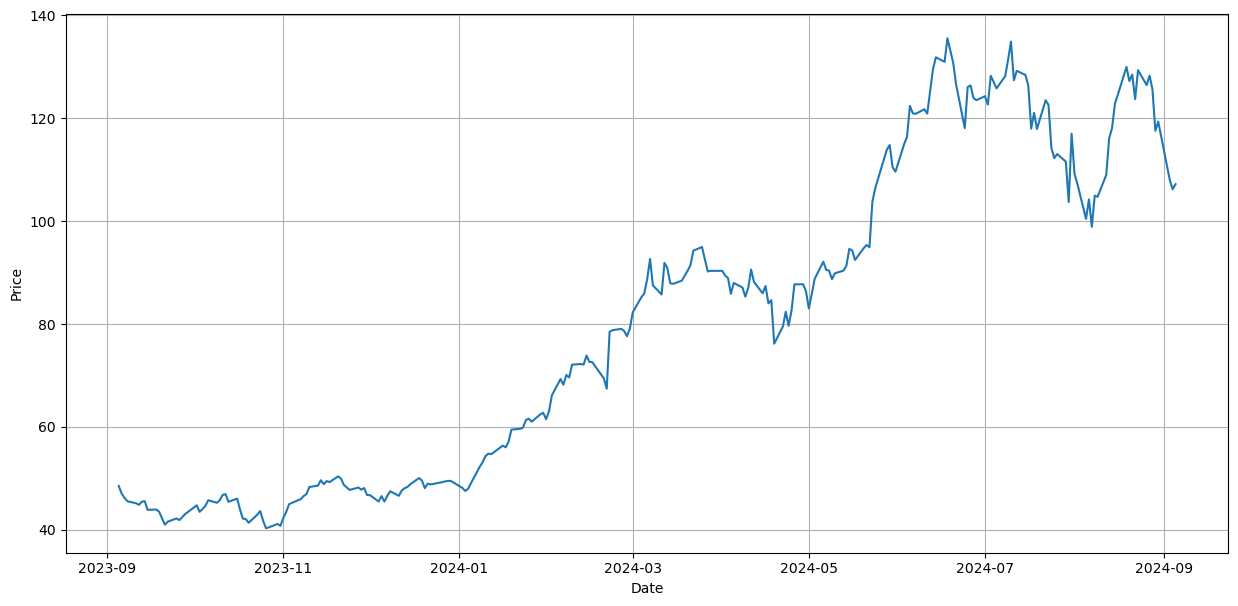

In [99]:
plt.figure(figsize=(15, 7))
plt.plot(NVDA['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

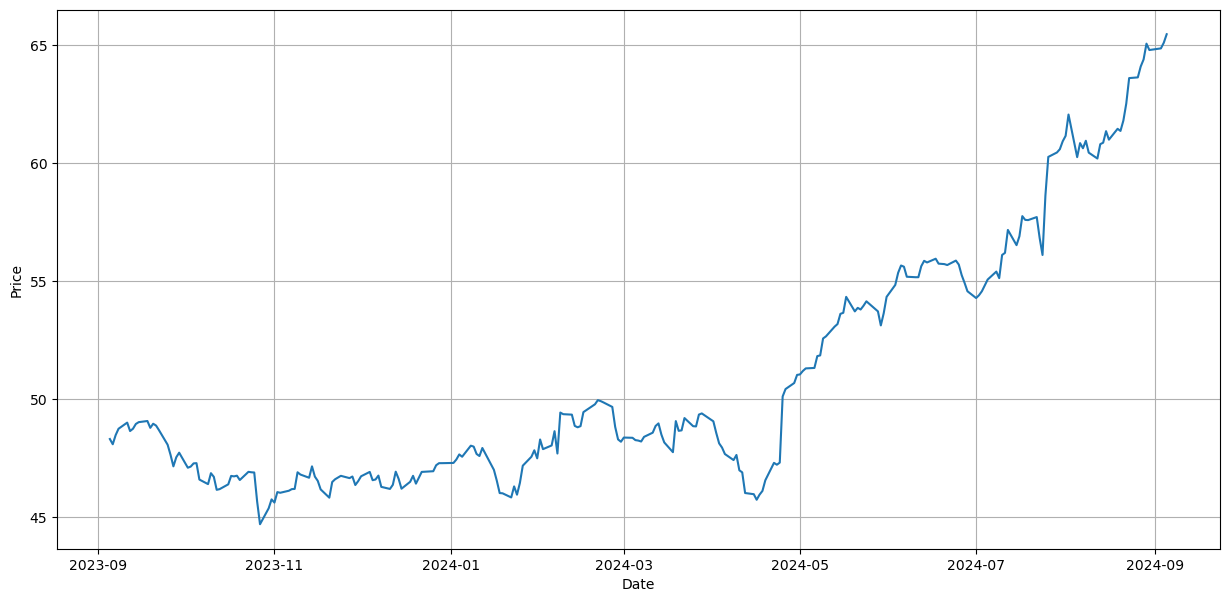

In [100]:
plt.figure(figsize=(15, 7))
plt.plot(UL['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

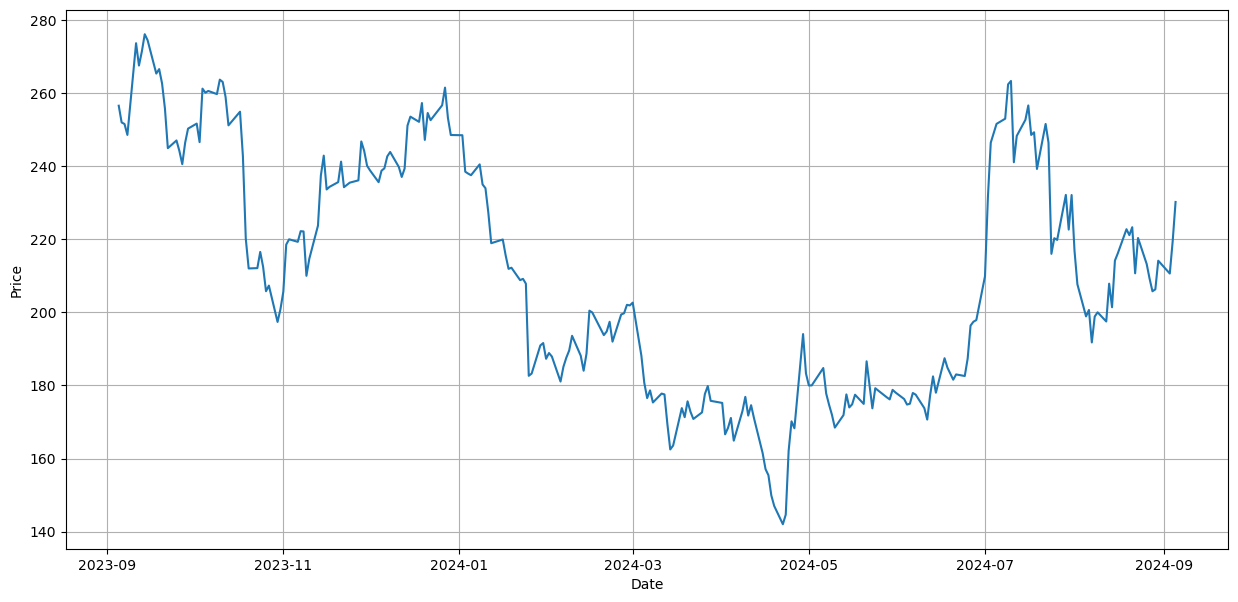

In [101]:
plt.figure(figsize=(15, 7))
plt.plot(TSLA['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

## Moving Average
Moving average - function whose value at each point is equal to some average of the original function for the previous period.

Formula for calculations:

SUM = sum of prices for past x days; MA=SUM/x

In [102]:
MA_days = [10, 20, 30]

for ma in MA_days:
    ma_str = "MA: {}".format(ma)
    MSFT[ma_str] = MSFT['Adj Close'].rolling(ma).mean()
    AAPL[ma_str] = AAPL['Adj Close'].rolling(ma).mean()
    NVDA[ma_str] = NVDA['Adj Close'].rolling(ma).mean()
    UL[ma_str] = UL['Adj Close'].rolling(ma).mean()
    TSLA[ma_str] = TSLA['Adj Close'].rolling(ma).mean()

In [103]:
MSFT.head(5)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-05  329.000000  334.850006  328.660004  333.549988  331.065002   
2023-09-06  333.380005  334.459991  330.179993  332.880005  330.400024   
2023-09-07  331.290009  333.079987  329.029999  329.910004  327.452148   
2023-09-08  330.089996  336.160004  329.459991  334.269989  331.779633   
2023-09-11  337.239990  338.420013  335.429993  337.940002  335.422302   

              Volume  MA: 10  MA: 20  MA: 30  
Date                                          
2023-09-05  18553900     NaN     NaN     NaN  
2023-09-06  17535800     NaN     NaN     NaN  
2023-09-07  18381000     NaN     NaN     NaN  
2023-09-08  19530100     NaN     NaN     NaN  
2023-09-11  16583300     NaN     NaN     NaN

In [104]:
def plot_graphic(company, company_string):
    plt.figure(figsize=(15, 6))
    plt.plot(company['Adj Close'])
    plt.plot(company['MA: 10'])
    plt.plot(company['MA: 20'])
    plt.plot(company['MA: 30'])
    
    plt.title(company_string)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(('Adj Close','MA: 10', 'MA: 20', 'MA:30'))
    plt.grid()
    plt.show()


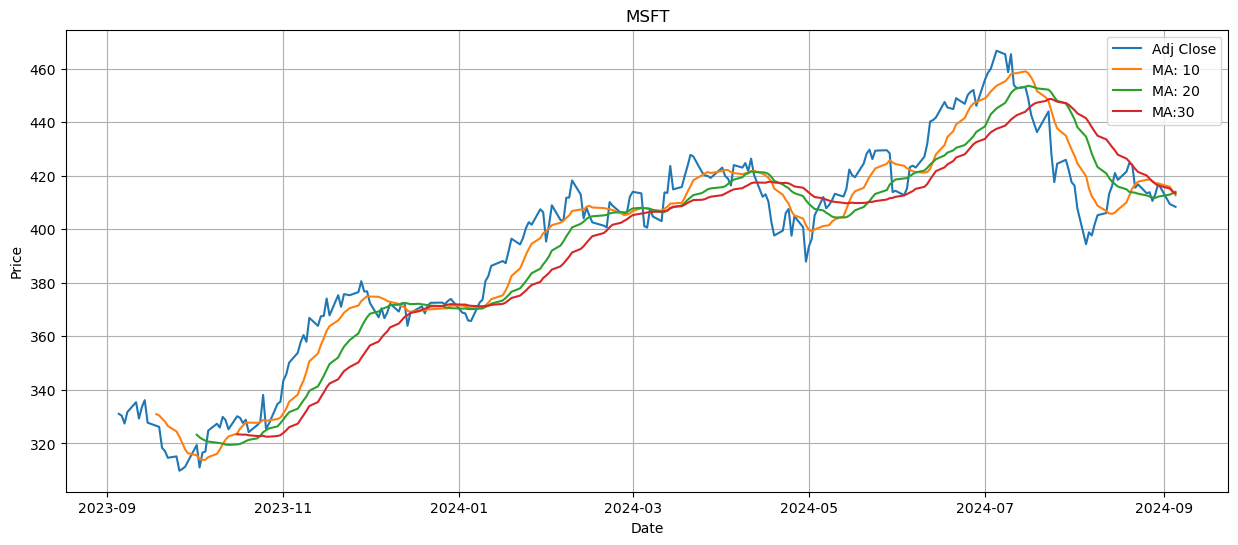

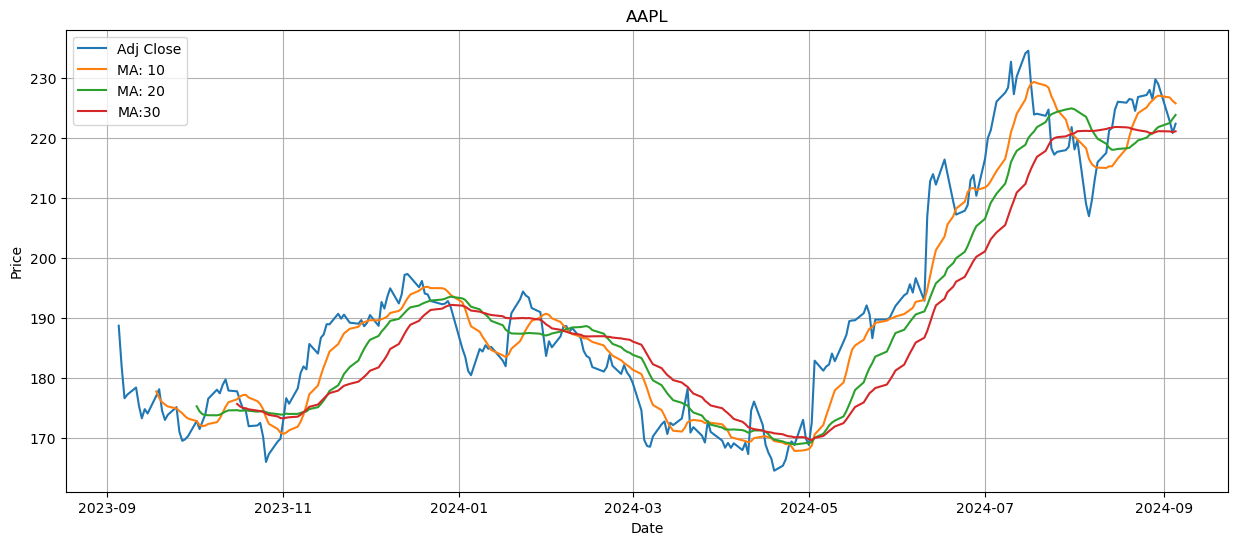

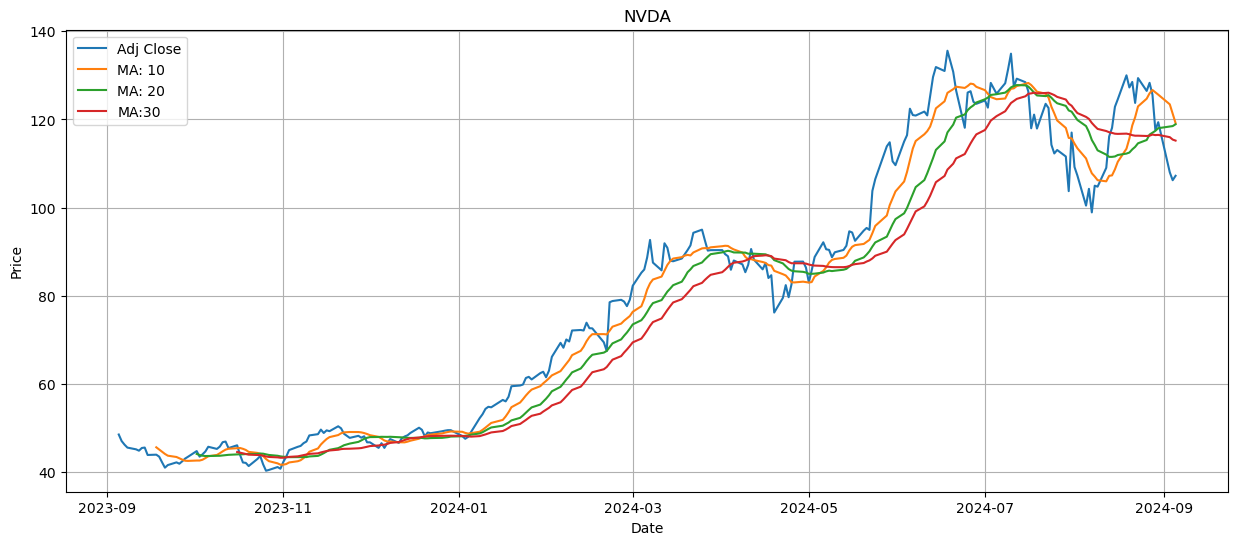

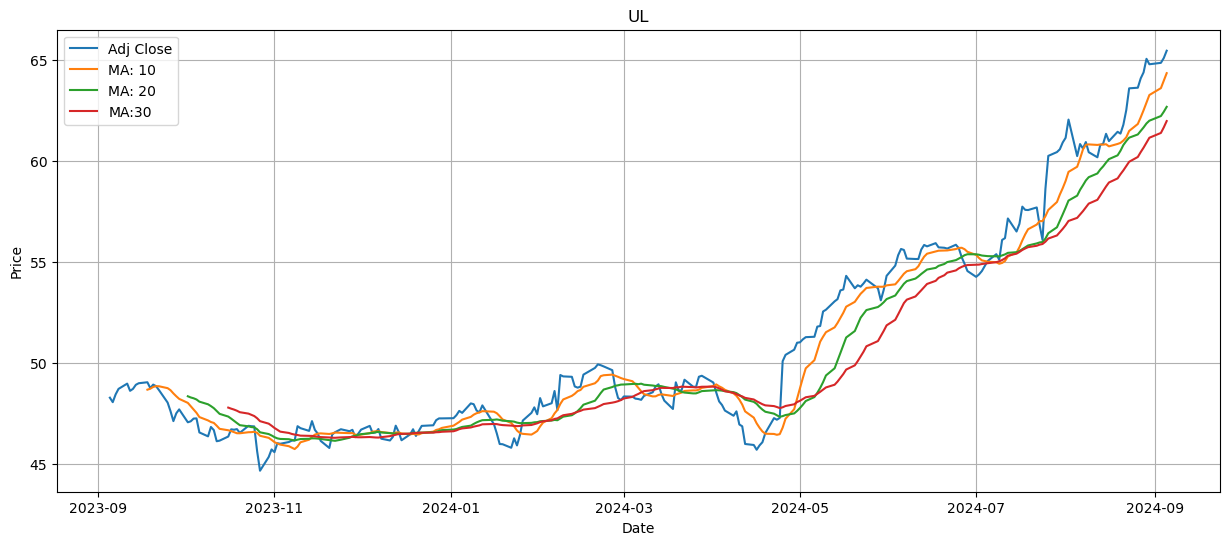

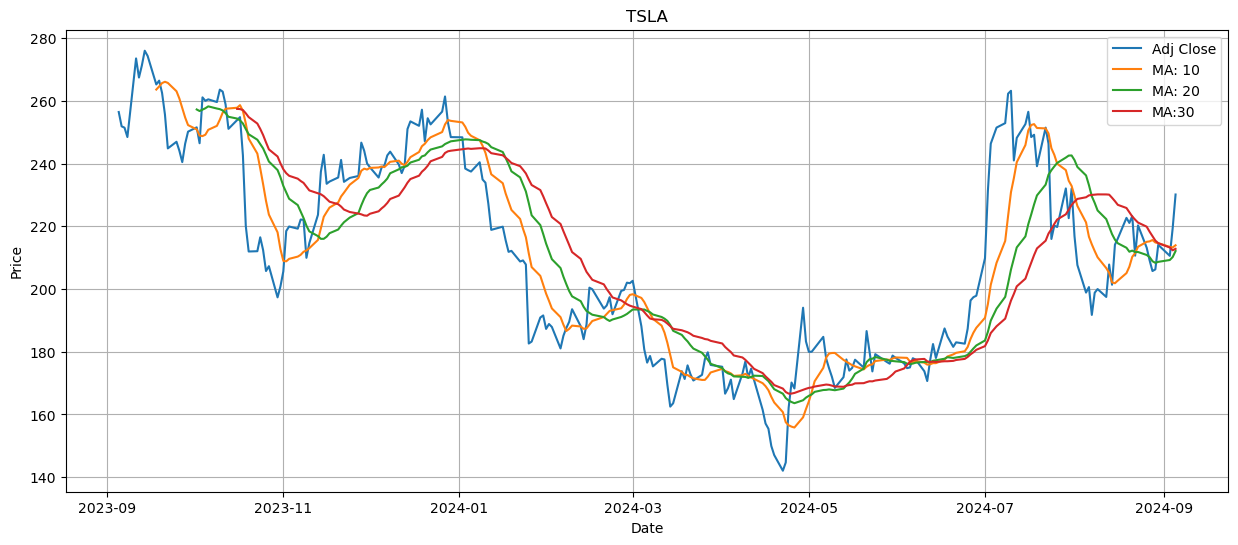

In [105]:
data_list = [MSFT, AAPL, NVDA, UL, TSLA]

for i in range(len(data_list)):   
    plot_graphic(data_list[i], company_list[i])

Long-term investors are generally less concerned with daily or even weekly price changes. Instead, they are more focused on the overall direction and performance of a stock or portfolio over months or years. A smoother curve helps to emphasize the long-term trend rather than the short-term noise, hence is why we are calculating the moving average. The moving average is a smoothing technique that averages out price changes over a period of time. This reduces the impact of short-term fluctuations and helps highlight the longer-term trend. 

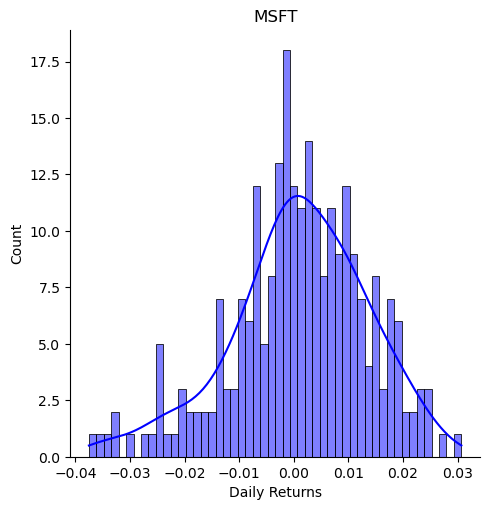

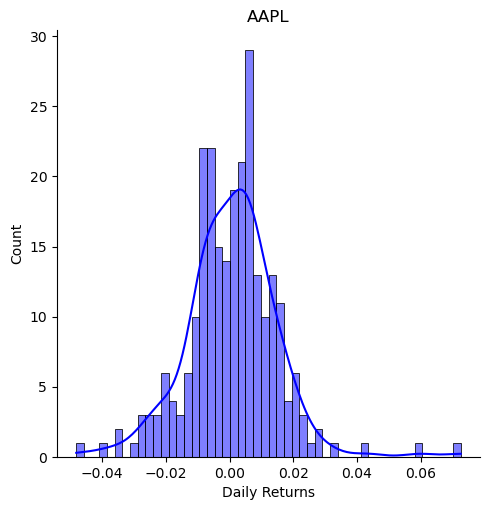

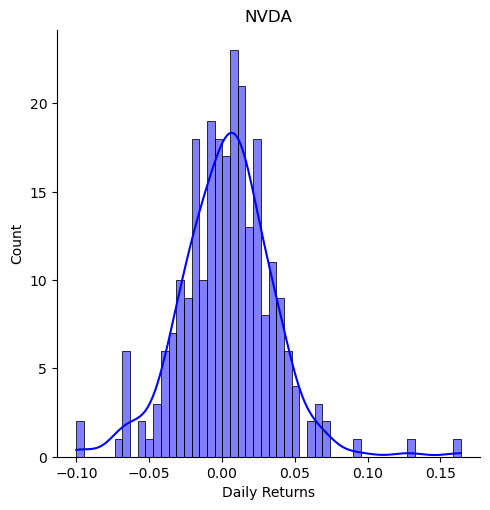

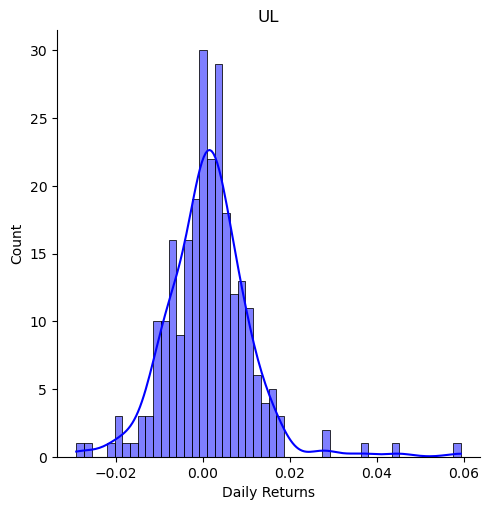

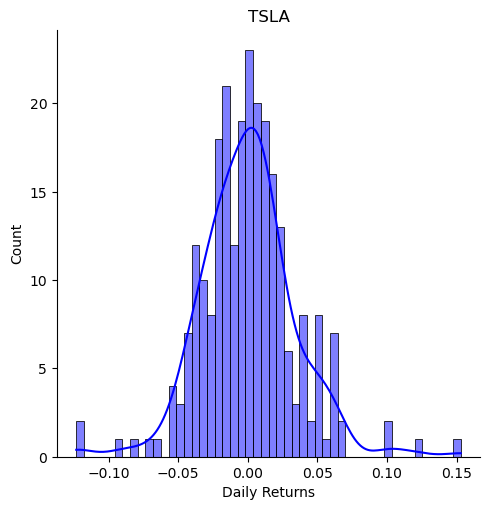

In [106]:
# Calculate returns and draw distribution

for i in range(len(data_list)):
    data_list[i]['Daily Returns'] = data_list[i]['Adj Close'].pct_change()
    sns.displot(data_list[i]['Daily Returns'].dropna(), bins=50, color='blue', kde=True)
    plt.title(company_list[i])
    plt.show()

In [107]:
# Create a dataframe with stock returns
stock_returns = pd.DataFrame(data=np.array([data['Daily Returns'] for data in data_list]).T, columns=company_list)
stock_returns.head()

MSFT      AAPL      NVDA        UL      TSLA
0       NaN       NaN       NaN       NaN       NaN
1 -0.002009 -0.035793 -0.030550 -0.004600 -0.017817
2 -0.008922 -0.029249 -0.017424  0.008037 -0.001707
3  0.013216  0.003492 -0.014468  0.005581 -0.011889
4  0.010979  0.006623 -0.008646  0.005352  0.100925

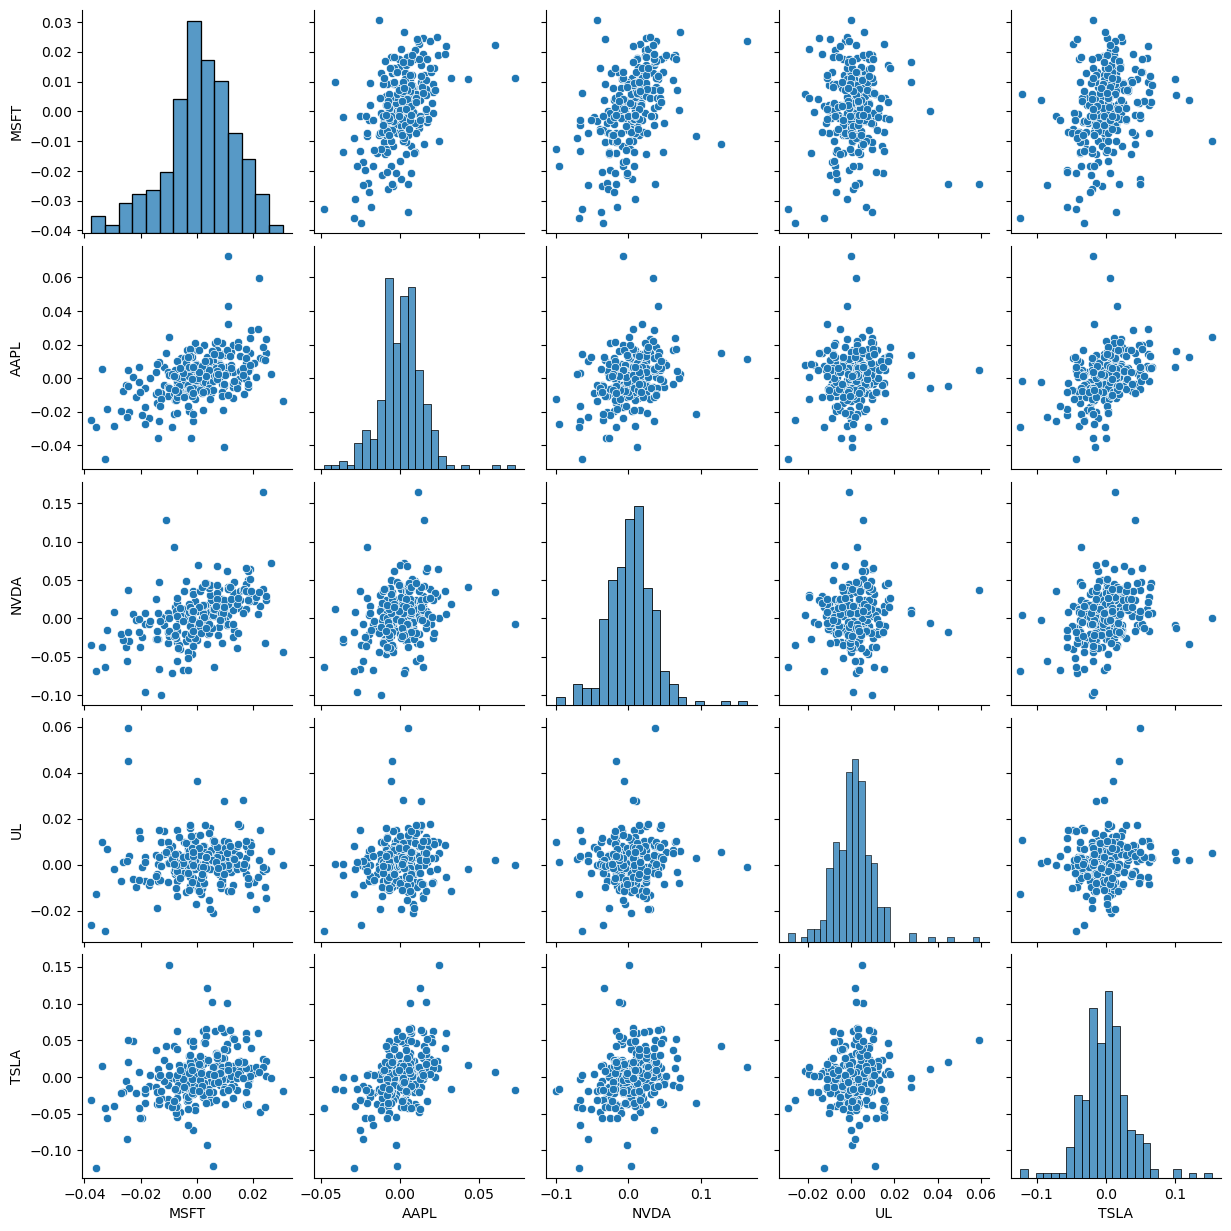

In [108]:
sns.pairplot(stock_returns.dropna())

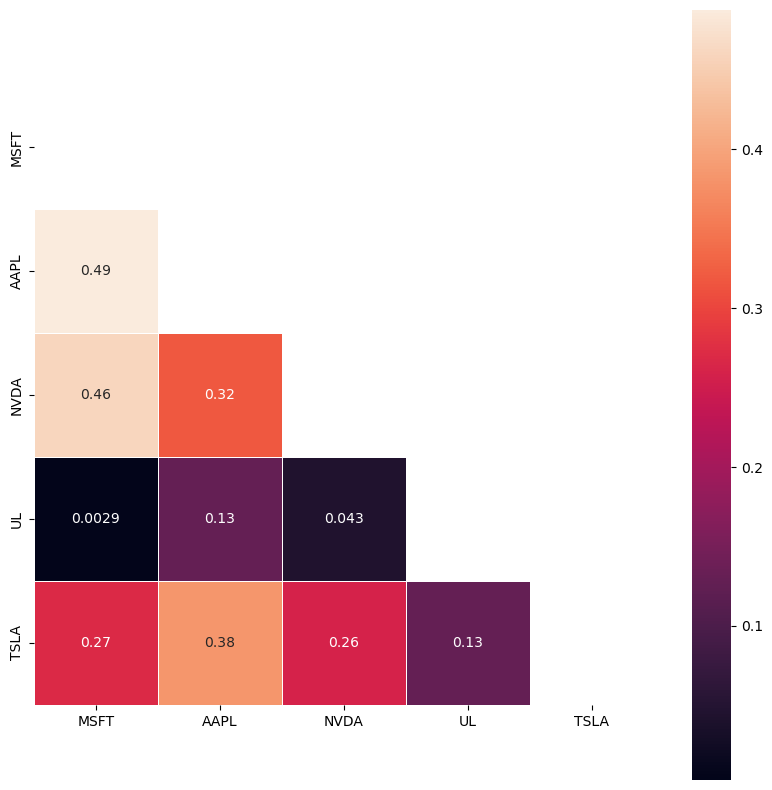

In [109]:
# Build correlation matrix
corr = stock_returns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

In [110]:
def draw_jointplot(data):
    grid = sns.PairGrid(data.dropna())
    grid.map_diag(sns.histplot, bins=40, kde=True)
    grid.map_lower(sns.regplot)
    grid.map_upper(sns.kdeplot)

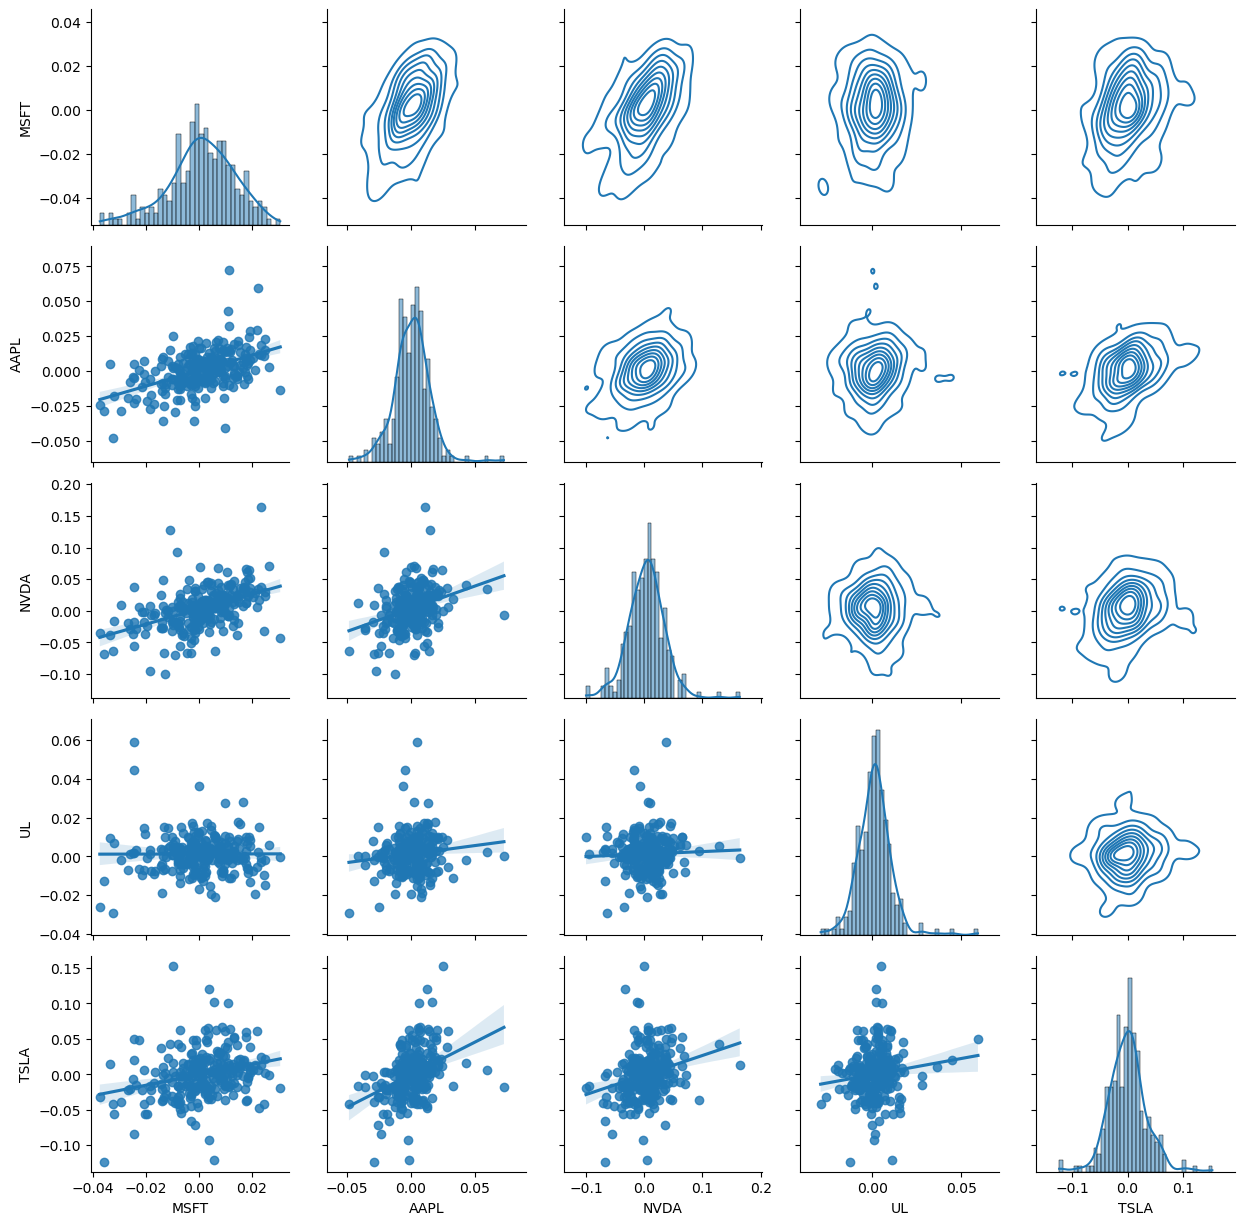

In [111]:
draw_jointplot(stock_returns)


From the graphics above, we see that all of our stocks have a positive correlation within the range of [0.13, 0.49]. Apple and Microsoft are most correlated in terms of daily profit, while Unilever and Tesla has the lowest correlation. 

## Portfolio Strategy

Our goal is to build an optimal portfolio consisting of five stocks. According to classical portfolio theory, we aim to minimize risk and maximize returns. We will generate random weightings for each stock and calculate the risk and return of each portfolio using appropriate formulas. 

The expected return of the portfolio is the weighted sum of the expected returns of the five stocks, with the weights representing the proportion of each stock in the portfolio. 

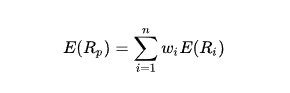

To calculate risk, we use a formula that incorporates the weights and the covariances between the stocks, allowing us to estimate the total risk of the portfolio based on how the stocks interact with each other. 

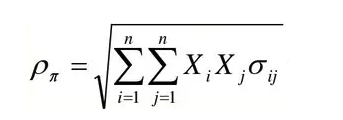

In [112]:
# Mean income for each stock
mean_income = stock_returns.mean()

# Covariation
cov_returns = stock_returns.cov()

count = len(stock_returns.columns)

print(mean_income, cov_returns, sep='\n')

MSFT    0.000912
AAPL    0.000751
NVDA    0.003661
UL      0.001254
TSLA    0.000150
dtype: float64
              MSFT      AAPL      NVDA            UL      TSLA
MSFT  1.568247e-04  0.000087  0.000186  3.563237e-07  0.000115
AAPL  8.673504e-05  0.000202  0.000145  1.778455e-05  0.000186
NVDA  1.858814e-04  0.000145  0.001036  1.336835e-05  0.000285
UL    3.563237e-07  0.000018  0.000013  9.382288e-05  0.000043
TSLA  1.150914e-04  0.000186  0.000285  4.293266e-05  0.001170


In [113]:
# Function that assigns random weights to stocks (while allocation sum 100%)
def randomPortfolio():
    share = np.exp(np.random.randn(count))
    share = share / share.sum()
    return share

In [114]:
# Calculate the expected return given portfolio weights ('Rand')
def IncomePortfolio(Rand):
    return np.matmul(mean_income.values, Rand)

# Calculate the overall risk (volatility) of the portfolio
def RiskPortfolio(Rand):
    return np.sqrt(np.matmul(np.matmul(Rand, cov_returns.values), Rand))

In [115]:
# Create containers to sore ('risk', 'income', 'portfolio')
combinations = 4000
risk = np.zeros(combinations)
income = np.zeros(combinations)
portfolio = np.zeros((combinations, count))

# Function to create new combination of shares
for i in range(combinations):
    rand = randomPortfolio()

    portfolio[i, :] = rand
    risk[i] = RiskPortfolio(rand)
    income[i] = IncomePortfolio(rand)
    

The Sharpe Ratio is used to find the most optimal portfolio because it measures the risk-adjusted return of an investment. It helps investors understand how much excess return (return above the risk-free rate) they are getting for each unit of risk they take on. 

When constructing a portfolio, investors seek the "most optimal" portfolio, which typically means the portfolio that offers the highest Sharpe ratio. This portfolio offers the best return for a given risk, ensuring the investor is making the most efficient use of their risk tolerance. 

$$
\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}
$$

**Where:**
- \( R_p \) is the expected portfolio return.
- \( R_f \) is the risk-free rate (e.g., returns of government bonds).
- \( \sigma_p \) is the standard deviation of the portfolio's returns (risk).



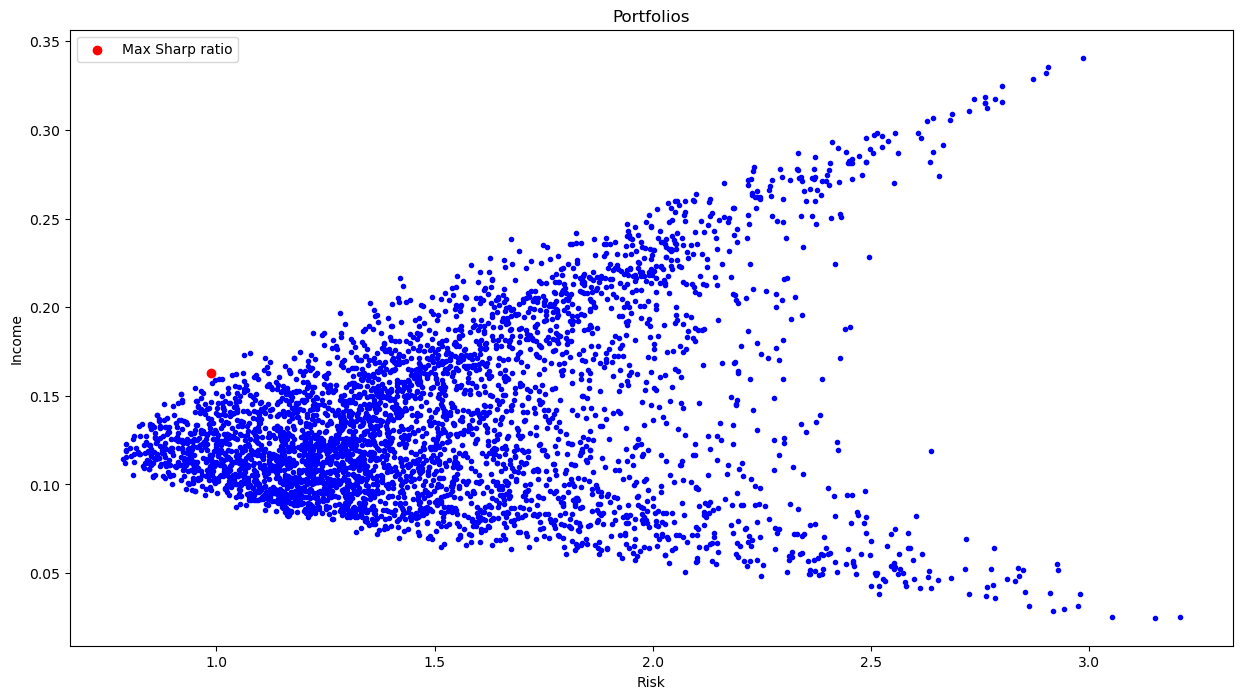

In [116]:
plt.figure(figsize=(15, 8))

plt.scatter(risk * 100, income * 100, c="b", marker=".")
plt.xlabel("Risk")
plt.ylabel("Income")
plt.title("Portfolios")
MaxSharpRatio = np.argmax(income / risk)
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio")

plt.legend()
plt.show()

In [117]:
# Output proportions of each stock
best_port = portfolio[MaxSharpRatio]
for i in range(len(company_list)):
    print("{} : {}".format(company_list[i], best_port[i]))

MSFT : 0.020423758951608532
AAPL : 0.01437757807712065
NVDA : 0.17271318163560903
UL : 0.7683696647784927
TSLA : 0.024115816557169184


Note that this notebook was created on August 20, 2024, and that running this notebook again some later time will result in a different output. The weighting for the the most optimal portfolio at this time is 8.24% in MSFT, 1.76% in AAPL, 21.89% in NVDA, 67.38% in UL, and 0.727% in TSLA. 

## Monte Carlo Simulation

We will try to predict price behavior using the Monte Carlo Simulation

In [118]:
# Prepare key statistics for stock price simulations for further portfolio analysis
days = 365
dt = 1 / days
stock_returns.dropna(inplace=True)

mu = stock_returns.mean()
sigma = stock_returns.std()

In [120]:
# Create Monte Carlo simulation function, based on Brownian motion
def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price


Text(0.5, 1.0, 'Monte Carlo analysis for Microsoft')

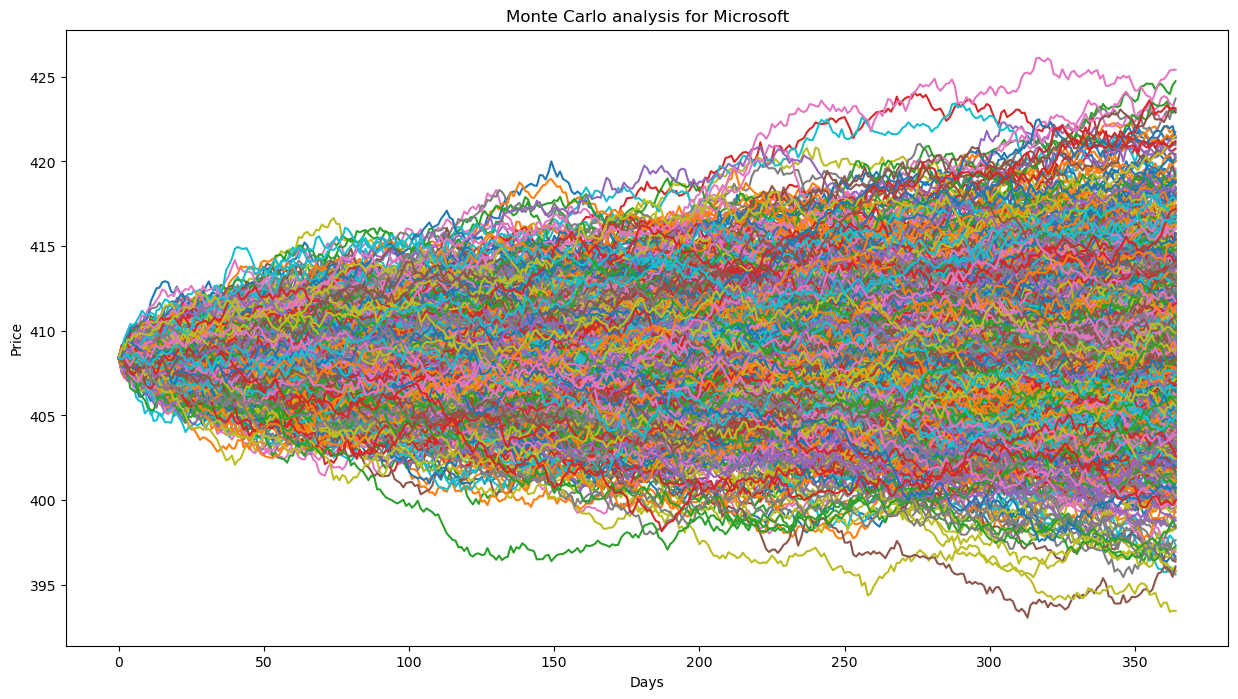

In [122]:
start_price = MSFT['Adj Close'].tail(1).values[0] # Get the last available adjusted close price
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['MSFT'], sigma['MSFT'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Microsoft')

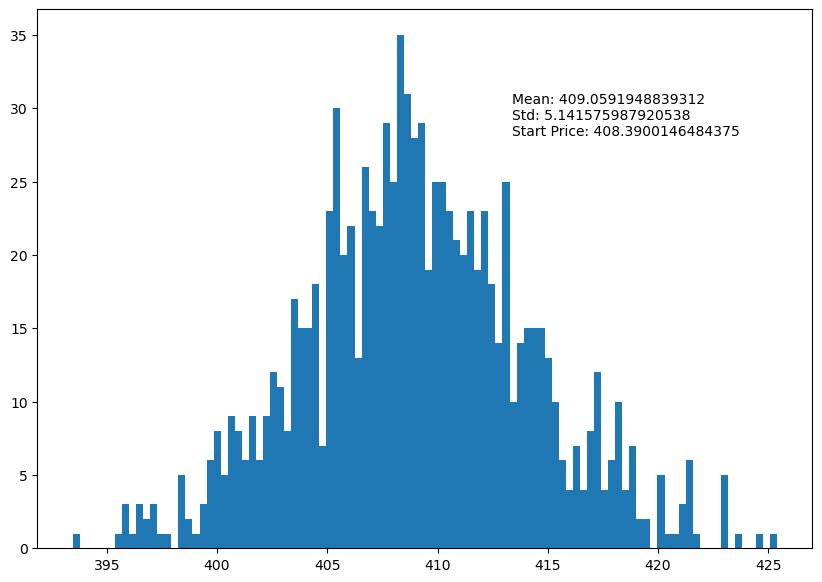

In [124]:
# Create visualization of distribution of the final stock price generated by Monte Carlo Simulation
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Based on the simulation, this stock appears to be low-risk in that it exhibits low volatility and maintains a price level close to the starting price. This would be a good stock if were looking for something stable and has a predictable performance. 

Text(0.5, 1.0, 'Monte Carlo analysis for Apple')

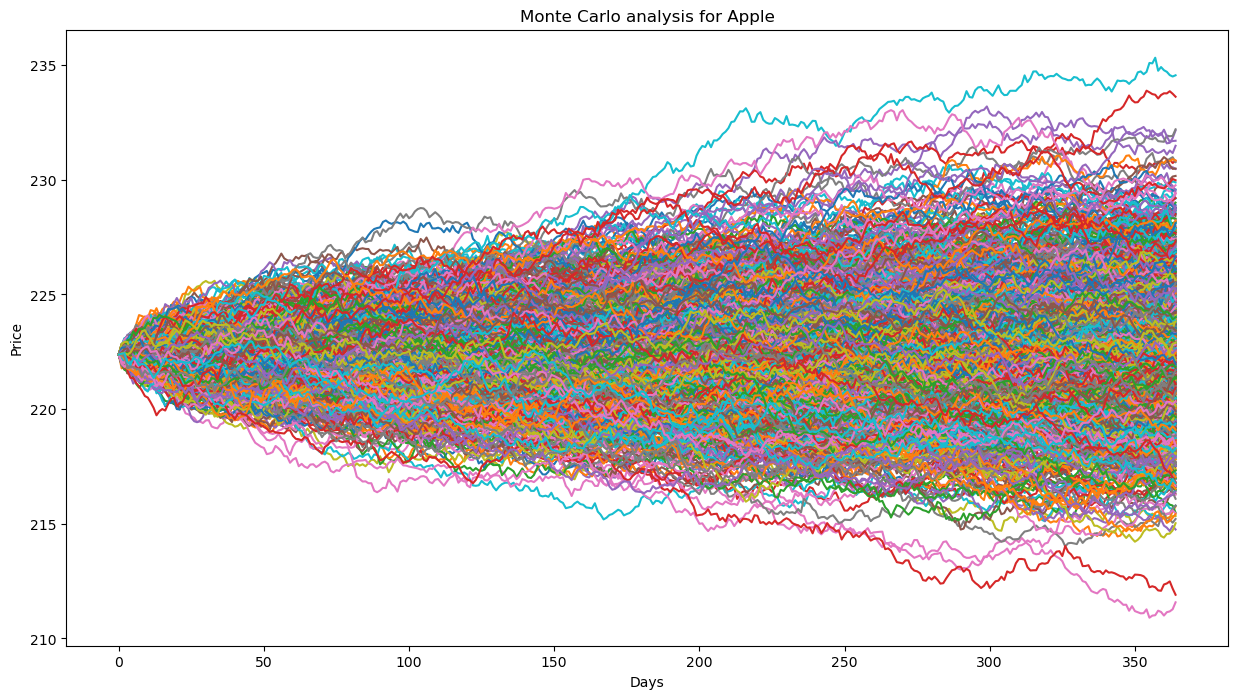

In [125]:
start_price = AAPL['Adj Close'].tail(1).values[0] # Get the last available adjusted close price
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['AAPL'], sigma['AAPL'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Apple')

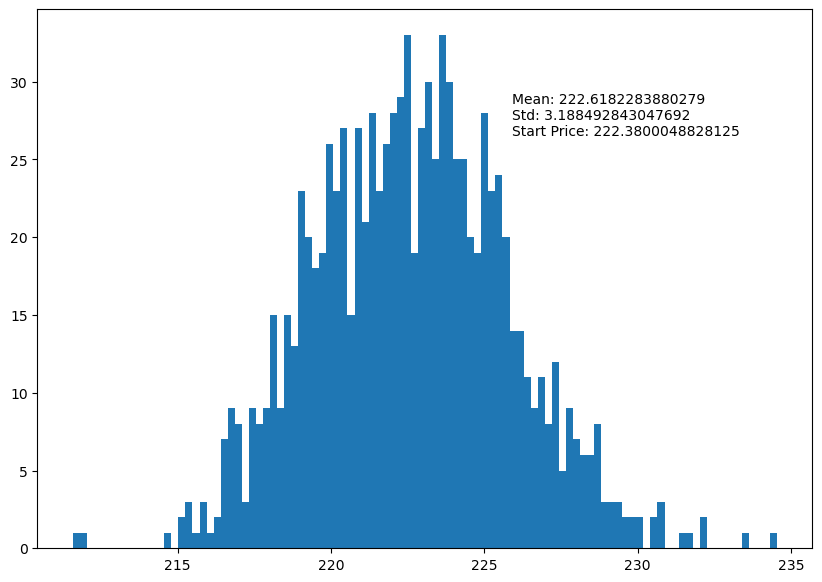

In [126]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Compared to our earlier results for MSFT, AAPL stock appears to have slightly lower volatility. This suggests that APl may be a bit less risky that MSFT, given the tighter clustering of potential future prices around the mean. Both stocks, however, appear to be relatively stable based on our simulations, given that the standard deviation is small compared to the starting price. 

Text(0.5, 1.0, 'Monte Carlo analysis for Nvidia')

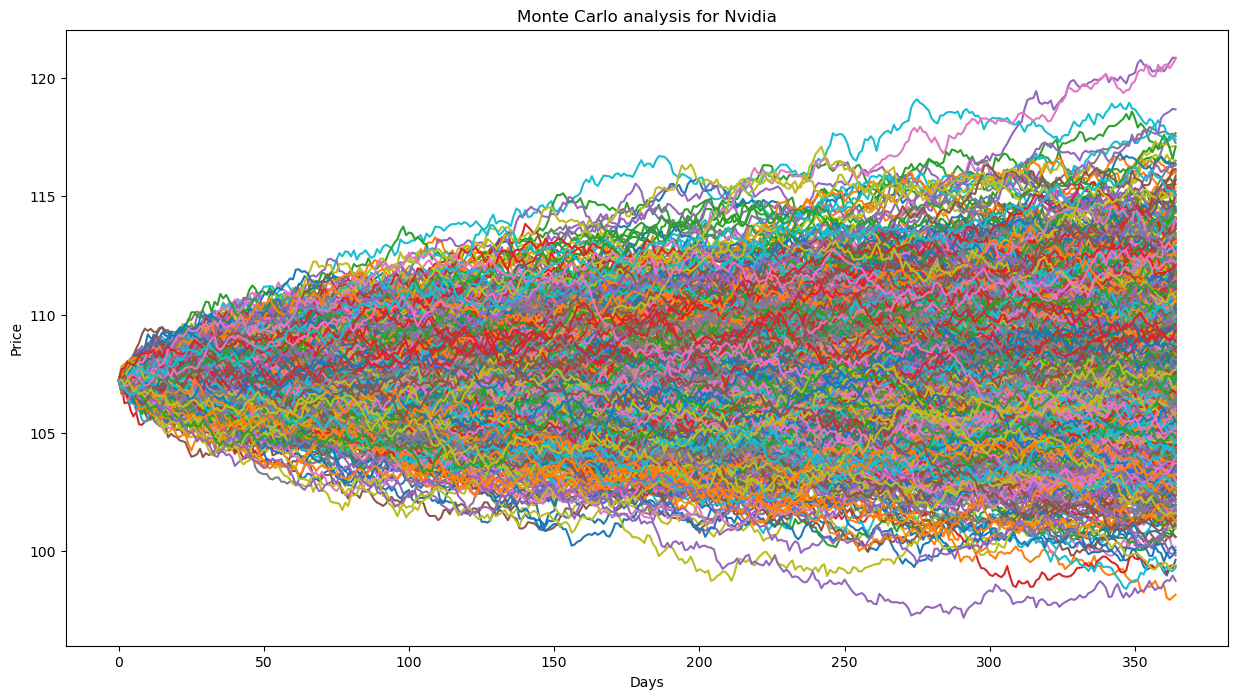

In [127]:
start_price = NVDA['Adj Close'].tail(1).values[0] # Get the last available adjusted close price
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['NVDA'], sigma['NVDA'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Nvidia')

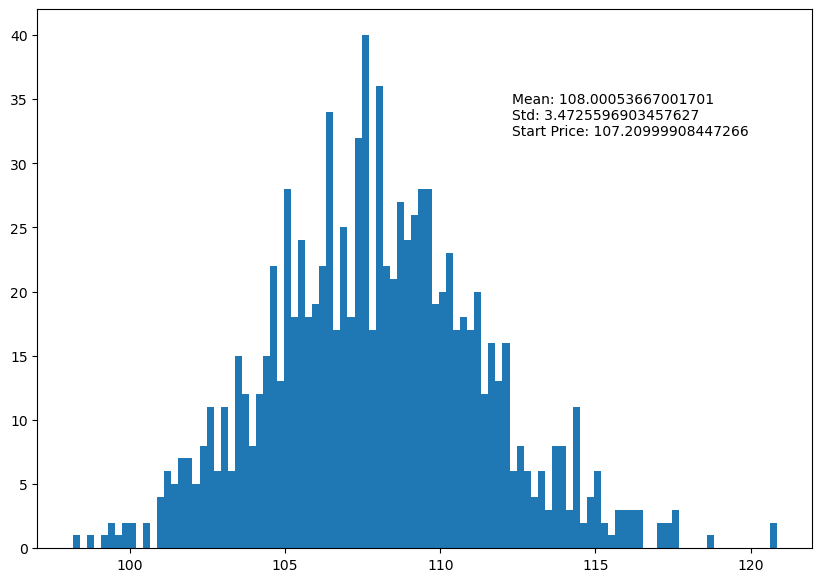

In [128]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Compared to AAPL (std of 3.19) and MSFT (std of 5.14), NVIDIA falls somewhere in the middle in terms of risk. Its standard deviation suggests that it is a bit more volatile than AAPL but less so than MSFT. The expected price increase (mean of 108 vs. start price of 107) suggests that NVIDIA has slightly more growth potential but carries a moderate amount of risk, as reflected by its volatility.

Text(0.5, 1.0, 'Monte Carlo analysis for Unilever')

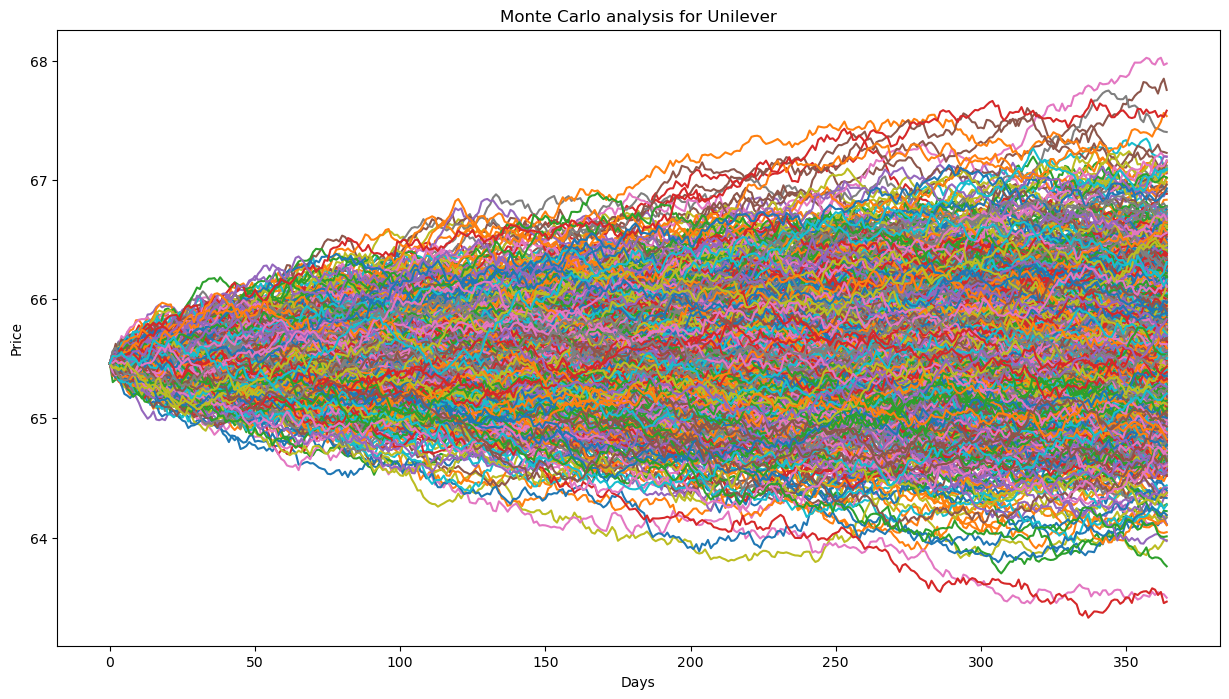

In [129]:
start_price = UL['Adj Close'].tail(1).values[0] # Get the last available adjusted close price
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['UL'], sigma['UL'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Unilever')

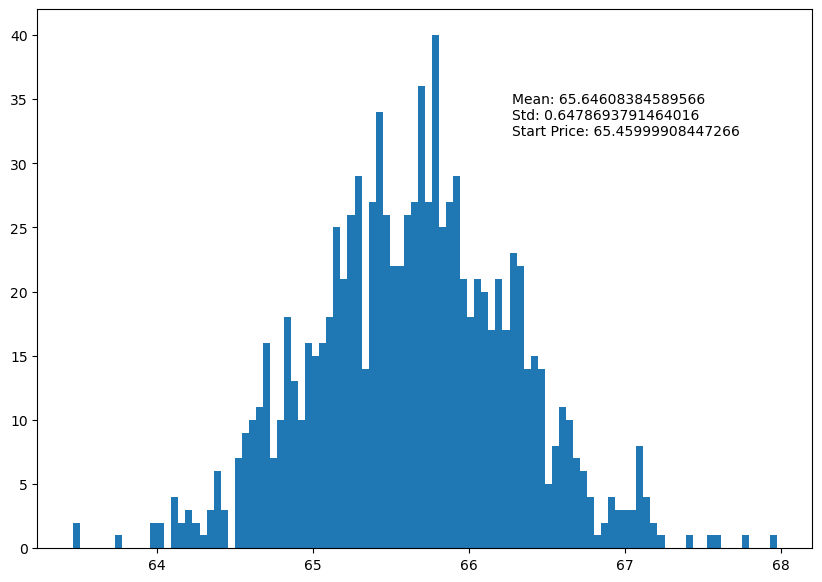

In [130]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Unilever appears to be a relatively low-risk stock based on these results. The small standard deviation suggests low volatility, meaning there is less risk of large price fluctuations. However, with such low expected growth (mean close to start price), Unilever might not offer significant returns in the short term but could be a more stable investment for risk-averse investors looking for consistency rather than high gains.

Text(0.5, 1.0, 'Monte Carlo analysis for Tesla')

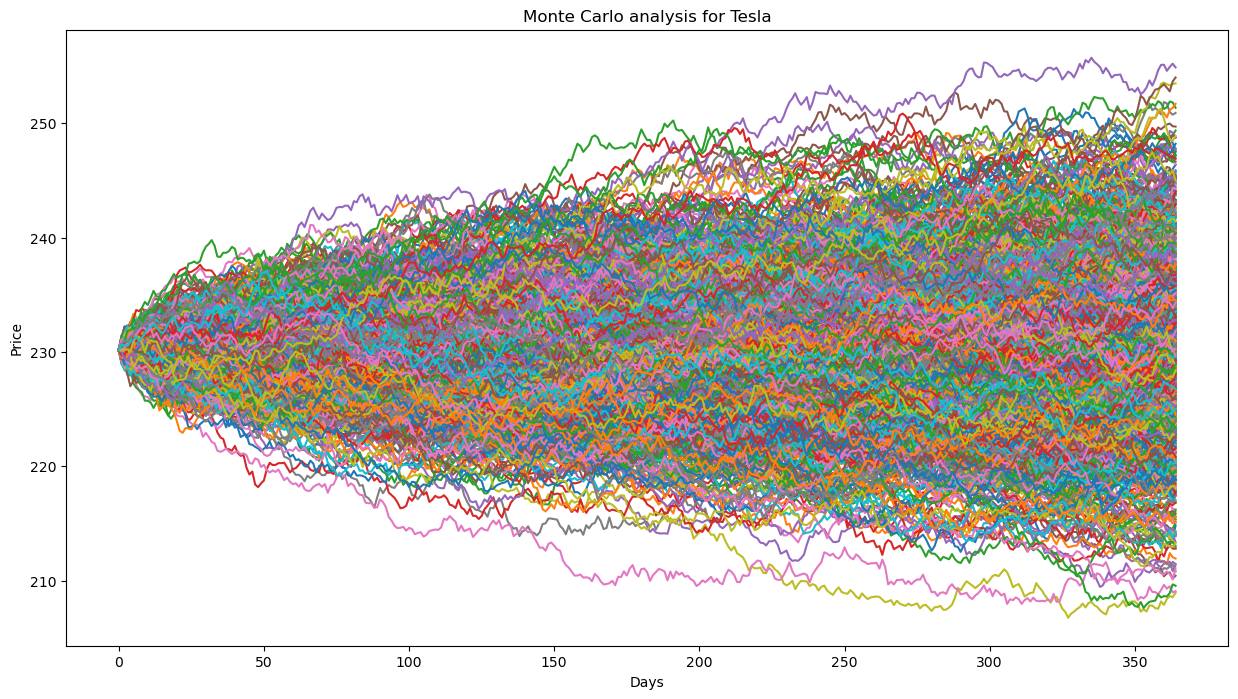

In [132]:
start_price = TSLA['Adj Close'].tail(1).values[0] # Get the last available adjusted close price
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['TSLA'], sigma['TSLA'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Tesla')

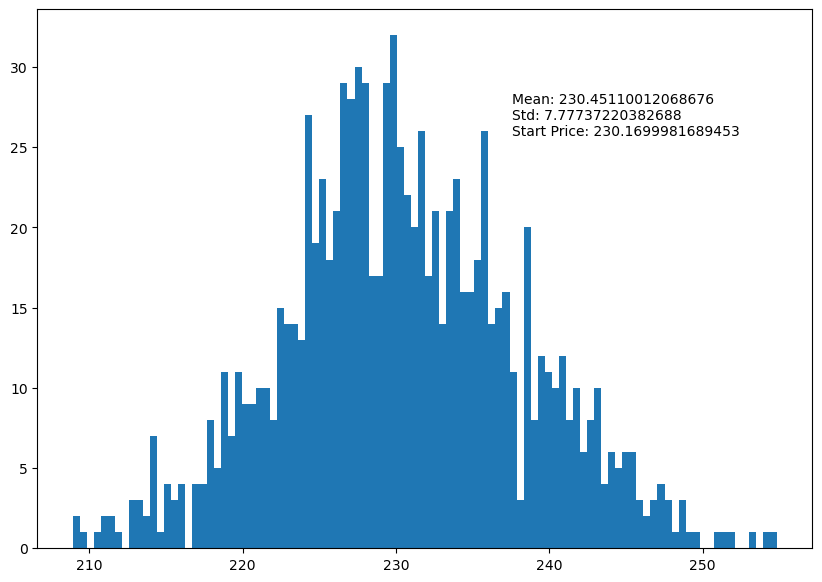

In [133]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Tesla has a relatively higher level of risk compared to more stable stocks like Unilever, as evidenced by the larger standard deviation. The volatility suggests that Tesla's price could experience substantial fluctuations over time. Investors should be aware that while there is potential for gain (since the mean is slightly higher than the starting price), there is also greater risk due to the stock's inherent volatility.

Tesla's stock might be more suitable for investors who are comfortable with taking on more risk for potentially higher rewards.







